# Check Firth

Identified which regressions were using firth (what the allele
  variant frequencies were in these cases, what the phenotype frequencies were
in these cases).

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = os.path.realpath('..')
outpath = os.path.join(path, "output/check_firth")

# Find frequency of each allele and each phenotype

In [3]:
# get names of cancer phe files
cancerphes = []
cancerphes_file = open(os.path.join(path, "data/cancerphes.txt"), "r")
for line in cancerphes_file.readlines():
    cancerphes.append(line[:-1])
cancerphes_file.close()
#print(cancerphes)

## Find the frequency of each phenotype

In [4]:
remove = np.loadtxt(
    os.path.join(path, "private_data/ukbb_files/sampleqc_16698.phe"), 
    usecols=[0], 
    dtype=int,
)

In [5]:
# subset to white British cohort
print("Number removed: {}".format(len(remove)))

Number removed: 151169


In [6]:
# testing out subsetting
cancerphes_path = "/oak/stanford/groups/mrivas/private_data/ukbb/16698/phe/cancer3/"
phe_data = pd.read_csv(cancerphes_path + "1003" + ".phe", delim_whitespace=True, 
                       header=None, index_col=[0], dtype=int)
print("number originally: {}".format(len(phe_data)))
phe_data = phe_data.drop(remove)
print("number after dropping: {}".format(len(phe_data)))
print((phe_data[2] == 2).sum())

number originally: 502628
number after dropping: 351459
19864


In [9]:
phe_freq = {}
# record the frequency of each cancer phenotype
cancerphes_path = "/oak/stanford/groups/mrivas/private_data/ukbb/16698/phe/cancer3/"
for i in range(len(cancerphes)):
    #phe_data = np.loadtxt(cancerphes_path + cancerphes[i] + ".phe", dtype=int, usecols=[2])
    phe_data = pd.read_csv(cancerphes_path + cancerphes[i] + ".phe", delim_whitespace=True, 
                       header=None, index_col=[0], dtype=int)
    # subset to white British cohort
    phe_data = phe_data.drop(remove)
    #case = np.sum(phe_data == 2)
    case = (phe_data[2] == 2).sum()
    phe_freq[cancerphes[i]] = case

In [10]:
# record the frequency of each hc phenotype
HC_path = "/share/PI/mrivas/data/ukbb/phefiles/highconfidenceqc/"
for i in range(446):
    #phe_data = np.loadtxt(HC_path + "HC" + str(i) + ".phe", dtype=int, usecols=[2])
    phe_data = pd.read_csv(HC_path + "HC" + str(i) + ".phe", delim_whitespace=True, 
                       header=None, index_col=[0], dtype=int)
    #case = np.sum(phe_data == 2)
    phe_data = phe_data.drop(remove)
    case = (phe_data[2] == 2).sum()
    phe_freq["HC" + str(i)] = case

In [11]:
phe_data.shape

(351459, 2)

In [32]:
out_fn = os.path.join(outpath, "phe_freq.csv")
if not os.path.exists(out_fn):
    freq_file = open(out_fn, "w")
    freq_file.write("phenotype,frequency\n")
    for key in phe_freq.keys():
        freq_file.write(str(key) + "," + str(phe_freq[key]) + "\n")
    freq_file.close()

## Find frequency of each allele variant

In [17]:
fn = os.path.join(path, "private_output/print_rds/ukb_hla_v2_rounded_remove.txt")
dosage_df = pd.read_csv(fn, header=0, delimiter=",")
# Note 2019/2/2 Chris: this is reading the index as a column, and putting that
# into the output file, but I'm going to leave it in case other code already 
# relies on this behavior.

In [24]:
dosage_df.drop(dosage_df.columns[0], axis=1).max().max()

2.0

In [20]:
dosage_df.shape

(337208, 363)

In [18]:
sum_df = dosage_df.sum(axis=0)
sum_df

Unnamed: 0    1.185071e+12
A_101         1.305650e+05
A_102         1.140000e+02
A_103         3.000000e+00
A_201         1.809690e+05
A_202         4.410000e+02
A_203         2.120000e+02
A_205         4.971000e+03
A_206         1.151000e+03
A_207         1.000000e+01
A_210         0.000000e+00
A_211         3.960000e+02
A_214         0.000000e+00
A_216         0.000000e+00
A_220         1.500000e+01
A_264         0.000000e+00
A_301         9.712500e+04
A_302         7.130000e+02
A_1101        4.027200e+04
A_1102        1.000000e+00
A_1103        2.000000e+00
A_2301        1.139600e+04
A_2402        4.737800e+04
A_2403        1.910000e+02
A_2404        1.000000e+01
A_2407        1.800000e+01
A_2410        4.000000e+00
A_2501        9.807000e+03
A_2601        1.104600e+04
A_2603        0.000000e+00
                  ...     
DPB1_1401     4.568000e+03
DPB1_1501     4.633000e+03
DPB1_1601     1.138000e+03
DPB1_1701     7.431000e+03
DPB1_1801     9.000000e+00
DPB1_1901     3.528000e+03
D

In [35]:
out_fn = os.path.join(outpath, "allele_freq.csv")
if not os.path.exists(out_fn):
    sum_df.to_csv(out_fn)

# Find firth counts

In [36]:
# create allele frequency dictionary
allele_freq_file = open(path + "notebooks/output/check_firth/allele_freq.csv","r")
allele_freq_file.readline()
allele_freq = {}
for line in allele_freq_file.readlines():
    line = line.split(",")
    allele_freq[line[0]] = int(line[1][:-3])
allele_freq_file.close()


In [37]:
# create phe frequency dictionary
phe_freq_file = open(path + "notebooks/output/check_firth/phe_freq.csv","r")
phe_freq_file.readline()
phe_freq = {}
for line in phe_freq_file.readlines():
    line = line.split(",")
    phe_freq[line[0]] = int(line[1][:-1])
phe_freq_file.close()


## Find frequency of phenotype and allele variant each time firth is used

In [38]:
firth_var = []
firth_phe = []
var_name = []
phe_name = []
no_firth_var = []
no_firth_phe = []
for phe in phe_freq.keys():
    if phe != "HC65":
        df = pd.read_csv(path + "data/PLINK_results/" + phe + ".PHENO1.glm.logistic.hybrid", 
                     delim_whitespace=True, header=0)
        df = df.loc[df['TEST'] == 'ADD'] 
        df1 = df[df["FIRTH?"] == "Y"]
        for row in df1.itertuples(index=True,name="Pandas"):
            firth_var.append(allele_freq[getattr(row,"ID")])
            firth_phe.append(phe_freq[phe])
            var_name.append(getattr(row,"ID"))
            phe_name.append(phe)
        df2 = df[df["FIRTH?"] == "N"]
        for row in df2.itertuples(index=True,name="Pandas"):
            no_firth_var.append(allele_freq[getattr(row,"ID")])
            no_firth_phe.append(phe_freq[phe])


In [39]:
index = 60001

print(var_name[index])
print(phe_name[index])
print(firth_phe[index])
print(firth_var[index])
print(len(var_name))
print(len(no_firth_phe))


B_5802
HC319
105
3
68278
117790


## Plotting Firth Results

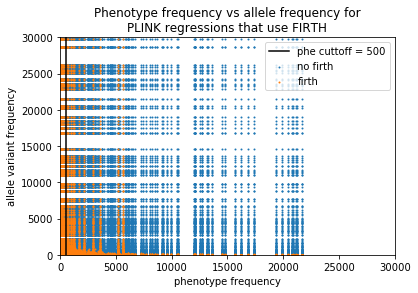

In [41]:
plt.close()
size = 1
a=1
use_all = False
ran = 30000
plt.scatter(no_firth_phe,no_firth_var,s=size,alpha=a,label="no firth")
plt.scatter(firth_phe,firth_var,s=size,alpha=a, label="firth")
#plt.axhline(y=5,c="k")
if not use_all:
    plt.axvline(x=500,c="k",label="phe cuttoff = 500")
plt.title("Phenotype frequency vs allele frequency for\nPLINK regressions that use FIRTH")
plt.xlabel("phenotype frequency")
plt.ylabel("allele variant frequency")
plt.legend(loc=1)
if use_all:
    plt.xlim([0,max(no_firth_phe)])
    plt.ylim([0,max(firth_var)])
    plt.savefig(outpath + "firth_plot_all.png")
else:
    plt.xlim([0,ran])
    plt.ylim([0,ran])

    plt.savefig(outpath + "firth_plot" + str(ran) + ".png")

plt.show()

